# Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dataset

In [ ]:
x= np.array([[1651.  ],
 [1691.82],
 [1732.63],
 [1773.45],
 [1814.27],
 [1855.08],
 [1895.9 ],
 [1936.71],
 [1977.53],
 [2018.35],
 [2059.16],
 [2099.98],
 [2140.8 ],
 [2181.61],
 [2222.43],
 [2263.24],
 [2304.06],
 [2344.88],
 [2385.69],
 [2426.51],
 [2467.33],
 [2508.14],
 [2548.96],
 [2589.78],
 [2630.59],
 [2671.41],
 [2712.22],
 [2753.04],
 [2793.86],
 [2834.67],
 [2875.49],
 [2916.31],
 [2957.12],
 [2997.94],
 [3038.76],
 [3079.57],
 [3120.39],
 [3161.2 ],
 [3202.02],
 [3242.84],
 [3283.65],
 [3324.47],
 [3365.29],
 [3406.1 ],
 [3446.92],
 [3487.73],
 [3528.55],
 [3569.37],
 [3610.18],
 [3651.  ]])

y = np.array([[432.65],
 [454.94],
 [471.53],
 [482.51],
 [468.36],
 [482.15],
 [540.02],
 [534.58],
 [558.35],
 [566.42],
 [581.4 ],
 [596.46],
 [596.71],
 [619.45],
 [616.58],
 [653.16],
 [666.52],
 [670.59],
 [669.02],
 [678.91],
 [707.44],
 [710.76],
 [745.19],
 [729.85],
 [743.8 ],
 [738.2 ],
 [772.95],
 [772.22],
 [784.21],
 [776.43],
 [804.78],
 [833.27],
 [825.69],
 [821.05],
 [833.82],
 [833.06],
 [825.7 ],
 [843.58],
 [869.4 ],
 [851.5 ],
 [863.18],
 [853.01],
 [877.16],
 [863.74],
 [874.67],
 [877.74],
 [874.11],
 [882.8 ],
 [910.83],
 [897.42]])

In [ ]:
# the dataset is 2d array with 50 rows and 1 column. Note it has only one feature x and one label y

In [ ]:
print(x.shape)
print(y.shape)

(50, 1)
(50, 1)


# Plot Dataset

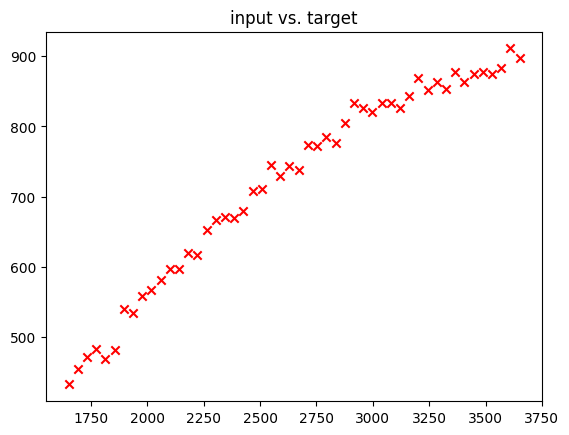

In [ ]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("input vs. target")
plt.show()

# Splitting Data

In [ ]:
# sklearn function train_test_split can be used to split data into different parts

In [ ]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


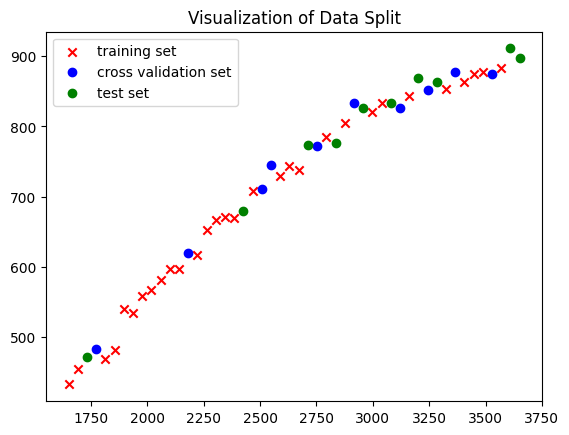

In [ ]:
# Plot training data
plt.scatter(x_train, y_train, marker='x', c='r', label = 'training set')

# Plot test data
plt.scatter(x_cv, y_cv, marker= 'o' , c = 'b', label = 'cross validation set')

# Plot cross-validation data (if available)
plt.scatter(x_test, y_test, marker = 'o', c = 'g', label = 'test set')

plt.legend()
plt.title('Visualization of Data Split')
plt.show()


# ORIGINAL DATA

# Feature Scaling

In [ ]:
# it is usually a good idea to perform feature scaling to help your model converge faster
# you can perfrom feature scaling via z-score normalizing formula or you can do it using sklearn function

In [ ]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_train_scaled = scaler_linear.fit_transform(x_train)

In [ ]:
print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


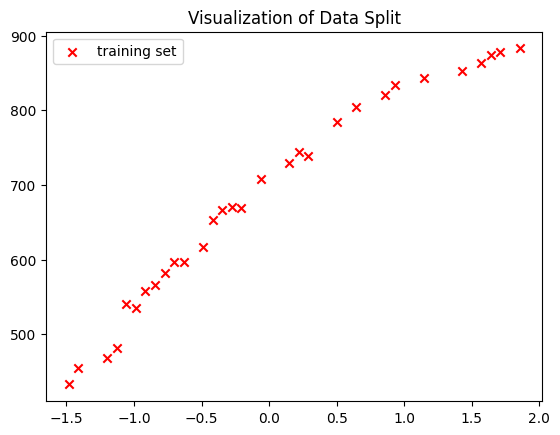

In [ ]:
# Plot training data
plt.scatter(x_train_scaled, y_train, marker='x', c='r', label = 'training set')

plt.legend()
plt.title('Visualization of Data Split')
plt.show()

# Train Model

In [ ]:
# using sklearn to train model

In [ ]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train_scaled, y_train )

LinearRegression()

# Calculating MSE

In [ ]:
# To evaluate the performance of your model, you will measure the error for the training and cross validation sets.

In [ ]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(x_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

training MSE (using sklearn function): 406.18142643101237


In [ ]:
# An important thing to note when using the z-score is you have to use the mean and standard deviation
# of the training set when scaling the cross validation set.

In [ ]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv) # now scaler_linear.fit_transoform is not used because we are using previous mean and std

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7633686764407


# Adding Polynomial Features

In [ ]:
# Above we were considering a scenario where the data was non-linear. Let's try using what we know so far
# to fit a non-linear curve. We will do polynomial regression

In [ ]:
# The code below demonstrates how to do this using the PolynomialFeatures class. It will create a new input
# feature which has the squared values of the input x (i.e. degree=2).

In [ ]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[3.32447000e+03 1.10521008e+07]
 [2.34488000e+03 5.49846221e+06]
 [3.48773000e+03 1.21642606e+07]
 [2.63059000e+03 6.92000375e+06]
 [2.58978000e+03 6.70696045e+06]]


# POLYNOMIAL REGRESSION

# Feature Scaling

In [ ]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 1.42716085  1.47236975]
 [-0.27690826 -0.36461578]
 [ 1.71116367  1.84024054]
 [ 0.22010538  0.10558969]
 [ 0.14911337  0.03512103]]


# Train Model

In [ ]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

LinearRegression()

# Calculating MSE

In [ ]:
# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

Training MSE: 49.115763074720526


In [ ]:
# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 87.694664384358


# MSE Testing / Increasing Polynomial Degree

In [ ]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):

    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)

    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)

    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

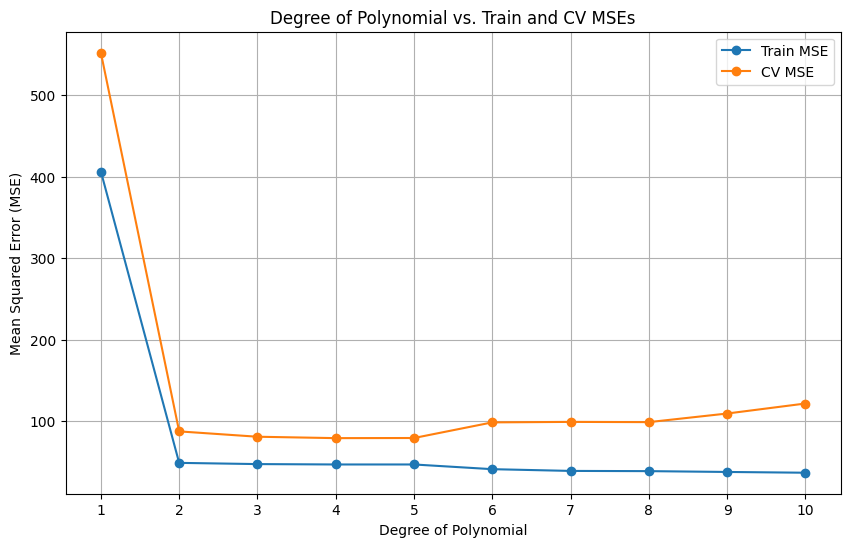

In [ ]:
degrees = range(1,11)
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mses, label='Train MSE', marker='o')
plt.plot(degrees, cv_mses, label='CV MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Degree of Polynomial vs. Train and CV MSEs')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

# Choosing Best Model

In [ ]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


In [ ]:
# np.argmin(cv_mses): This function from the NumPy library returns the index of the minimum value in the cv_mses

In [ ]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled) # python indices starts from zero (degree-1)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.42
Test MSE: 104.64


# END